### 군집분석
각 객체의 유사성을 측정하여 유사성이 높은 대상집단을 분류하는 통계적 기법이다. 군집에 속한 객체들의 유사성과 서로 다른 군집에 속한 객체간 상이성을 규명하는 분석으로, 종속변수가 필요없어 비지도학습에 해당한다. 머신러닝 분야에서는 이상값 탐지 등에도 사용되고 있다.


<b><팁></b> 요인분석과 군집분석의 차이점
- 군집분석 : 객체간 상이성을 규명하고 군집 특징을 파악하고자 하는 목적
- 요인분석 : 유사하나, 데이터의 유사한 변수를 묶어 다중공선성을 줄이고자 하는 목적


##### 1) 계층적 군집분석
n개 군집으로 시작해 점차 군집의 개수를 줄여나가는 방법으로, 군집 거리를 계산하는 방법에 따라 사용하는 연결법이 달라지며 모든 연결법은 거리행렬을 통해 가까운 거리의 객체들 관계를 규명하고 분석가는 해당 결과로 군집 개수를 선택한다.
- 최단연결법 : 거리행렬에서 거리가 가장 가까운 데이터를 묶어서 군집을 형성
- 최장연결법 : 데이터와의 거리를 계산할 때 최장거리를 거리로 계산
- 평균연결법 : 데이터와의 거리를 계산할 때 평균을 거리로 계산
- 중심연결법 : 두 군집의 거리를 두 군집의 중심간 거리로 계산
- 와드연결법 : 각 데이터 거리보다 군집 내 편차들의 제곱합에 근거를 두고 군집화, 데이터 크기가 너무 크지않다면 주로 많이 사용하는 방법
    - 군집내 편차는 작고 군집간 편차는 크게 군집화시키는 것이 정보의 손실(SSE)을 최소화시킬 수 있다. 
    - 상대적으로 계산량이 많다는 단점은 있지만 군집 크기를 비슷하게 만들며 해석력이 좋다는 장점이 있다.

In [2]:
# Murder : 살인체포(100,000명당)
# Assault : 폭행체포(100,000명당)
# UrbanPop : 도시인구비율
# Rape : 강간체포(100,000명당)
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from matplotlib import pyplot as plt

US = pd.read_csv('./data/USArrests.csv')

US.columns = ['State', 'Murder', 'Assault', 'UrbanPop', 'Rape']
labelList=US.State.tolist()
US.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


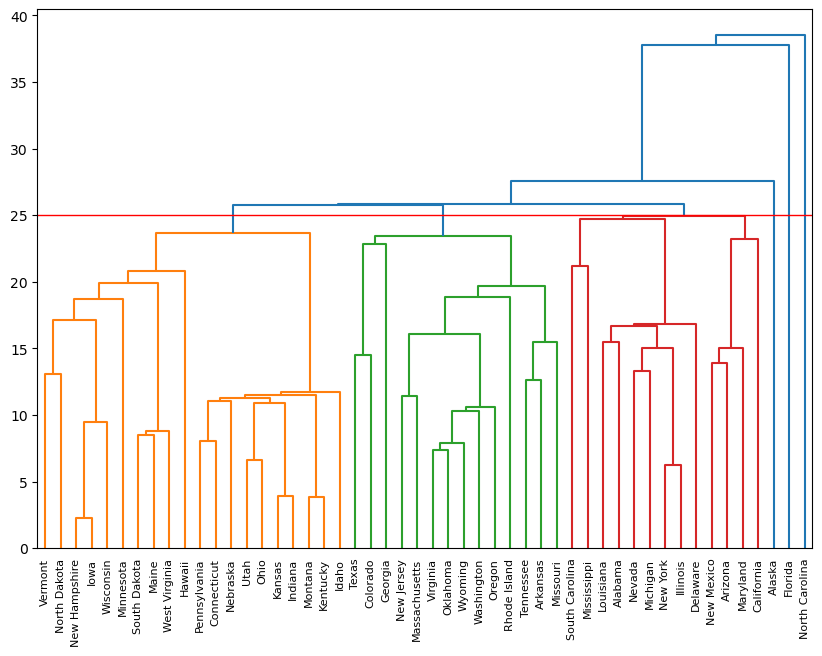

In [3]:
# method: single(최단), complete(최장), average(평균), centroid(중심), ward(와드)
# metric: seuclidean(표준화), mahalanobis(마할라노비스), chebyshev(체비셰프), cityblock(맨해튼), minkowski(민코우스키), jaccard(자카드), cosine(코사인유사도)

# 최단연결법
single = linkage(US.iloc[:, 1::], metric ='euclidean', method='single')

# 덴드로그램 그리기
plt.figure(figsize=(10, 7))
dendrogram(single,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            color_threshold=25,   #군집의 수를 설정하는 Height 값 설정
            show_leaf_counts=True)

plt.axhline(y=25, color='r', linewidth=1)  #Height 값에 따라 선을 그어 적절한 군집 수 설정
plt.show()

linkage 매개변수 중 metric은 suclidean으로 지정하였다. 덴드로그램을 그려보면 t값 기준을 25로 군집화 시켰을 때 6개의 군집이 생김을 예상할 수 있다. 왼쪽 3개의 군집은 갖고있는 객체 수가 비슷하지만 오른쪽 3개 군집은 1개의 객체만을 가지고 있음을 볼 수 있다.

최단연결법은 군집이 가지고 있는 객체의 수가 비슷하지 않아, 군집을 해석하기에 어려울 수 있다. 이러한 문제점 보완을 위해, 주로 와드연결법을 사용한다.

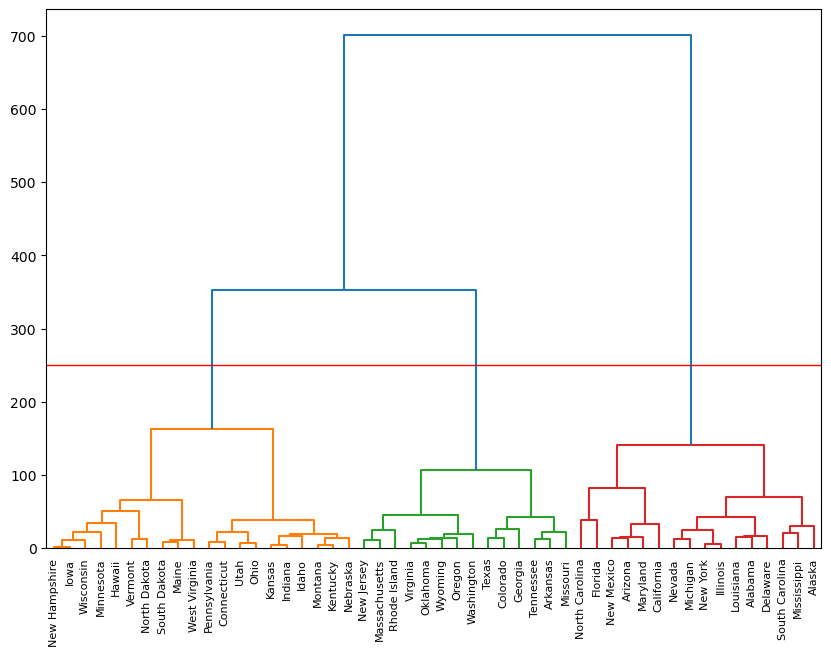

In [4]:
# 와드연결법
ward = linkage(US.iloc[:, 1::], metric ='euclidean', method='ward')
# 덴드로그램 그리기
plt.figure(figsize=(10, 7))
dendrogram(ward,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            color_threshold=250,
            show_leaf_counts=True)
plt.axhline(y=250, color='r', linewidth=1)  #Height 값에 따라 선을 그어 적절한 군집 수 설정
plt.show()

와드연결법에서도 최단연결법과 마찬가지로 euclidean 거리공식을 사용하여 군집분석하였다. t값을 250으로 놓았을 때, 3개의 군집으로 적절히 나누어지는 것을 알 수 있으며, 각 군집의 수가 비슷함을 볼 수 있다. 이와같이 와드연결법은 분석가가 덴드로그램을 통해 군집을 해석하기 쉽다는 장점이 있다.

와드연결법을 통해 적절한 t값을 확인하였으면 fcluster 함수를 통해 t값을 적용시켜 각 객체들이 가진 군집번호를 데이터화시킬 수 있다.

In [5]:
# state마다 어떤 군집에 설정되었는지 확인
assignments = fcluster(ward, 250, 'distance')
assignments

array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 2, 1,
       3, 1, 2, 3, 3, 1, 3, 2, 1, 1, 1, 3, 3, 2, 2, 3, 2, 1, 3, 2, 2, 3,
       3, 2, 2, 3, 3, 2], dtype=int32)

fcluster 결과값은 array형태이므로 새로운 변수에 할당 후 그룹으로 묶어 각 군집 특성을 파악해볼 수 있다.

In [6]:
US['cluster'] = assignments
US.groupby('cluster').mean()


C:\Users\heo\AppData\Local\Temp\ipykernel_5500\1437844072.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  US.groupby('cluster').mean()


,Murder,Assault,UrbanPop,Rape
cluster,,,,
1,11.812500,272.562500,68.312500,28.375000
2,8.214286,173.285714,70.642857,22.842857
3,4.270000,87.550000,59.750000,14.390000


1번 집단의 경우 2, 3번 집단보다 살인, 폭행, 강간이 많으므로 상대적으로 치안이 좋지 않은 도시의 집단이라고 할 수 있다.
반대로 3번 집단은 치안이 좋은 지역이라고 판단할 수 있다.

##### 2) 비계층적 군집분석
계층적 군집분석은 순차적으로 군집화되는 덴드로그램을 보고 적절한 군집 수를 직접 판단하지만, 비계층적 군집분석은 순차적 군집화가 아니라 <b>랜덤하게 군집을 묶어가는</b> 알고리즘이 사용된다.

거리를 계산하는 방법으로 군집화를 시키지만 사용되는 알고리즘에 따라 군집분석 명칭이 달라진다.(K-means, DBSCAN, 혼합분포 군집분석)

##### 2-1) K-means
속성의 개수가 적은 단순한 데이터에 많이 활용되는 알고리즘이다. 주어진 데이터를 k개 클러스터로 군집화하며 각 클러스터와 거리차이의 분산을 최소화하는 방식으로 작동한다.
- 초기값 설정 : 비계층적 군집분석은 k의 정보를 미리 알려줘야한다. (예. k값을 3으로 설정할 경우 임의 3개의 데이터를 각 클러스터의 중심점으로 설정한다.)
- 클러스터 설정 : 각 데이터로부터 각 클러스터들의 중심점까지의 유클리드 거리를 계산해, 해당 데이터에서 가장 가까운 클러스터를 찾아 데이터를 배당한다.
- 클러스터 중심 재조정 : mu_i를 각 클러스터에 있는 데이터들의 무게중심값으로 재설정한다.
- 클러스터 설정과 중심재조정을 반복하다 알고리즘 중심 변화가 작을 때, 반복을 중지한다.


알고리즘이 쉽고 간결하다는 장점이 있으나, 군집 수 k를 스스로 판단하여 알고리즘에 적용시켜야 하며 변수가 많을 경우 군집화의 정확도가 떨어진다는 단점이 있다. 이때는 차원축소(PCA)를 고려해야 한다.
<최적 군집 개수 판단법>
  - 콜린스키 하라바츠 스코어 : 모든 클러스터에 대한 클러스터 간 분산과 클러스터 내 분산 합의 비율로 점수가 높을수록 성능이 좋다.
  - 엘보우 : 클러스터 내 오차제곱합을 클러스터 개수마다 비교, 반봅문을 통해 k를 늘려가며 계산한 sse값을 비교함. 어느순간 sse가 급격히 줄어드는 부분, 기울기가 소실되는 구간을 elbow로 판단하고 그 순간을 최적 클러스터 개수로 판단한다.

In [8]:
## target값을 활용하지 않고 군집분석 실시
# 필요한 모듈
import pandas as pd 
from sklearn.cluster import KMeans
# 데이터 로드
iris = pd.read_csv('./data/iris.csv')
X = iris.drop('target',axis=1)
X

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


k-means 군집분석을 위해 초기 k값을 지정해주어야 한다. 적절한 값을 모르는 상황이기에 반복문을 사용하여 적절한 k값을 탐색한다. (하라바츠 스코어, 엘보우 기법)

In [13]:
import warnings
warnings.filterwarnings('ignore')   # 경고무시

# 클러스터별 콜린스키 하라바츠 결과 비교
from sklearn.metrics import calinski_harabasz_score

for k in range(2, 10):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X)
    labels = kmeans_model.labels_
    print('k: ', k, ', score: ', calinski_harabasz_score(X, labels))

k:  2 , score:  513.3038433517568
k:  3 , score:  560.3999242466402
k:  4 , score:  529.1207190840455
k:  5 , score:  494.0943819140986
k:  6 , score:  474.51742958716295
k:  7 , score:  448.8714494416451
k:  8 , score:  436.61302488142496
k:  9 , score:  414.5303174051382


calinski_harabasz_score 결과 k값이 3일때 가장 높은 값을 가진다. 

k가 3이 적정함을  알 수 있지만 calinski_harabasz_score만 가지고 k값을 확정짓기 어려운 데이터가 있을 수 있다. 그런 경우 분산에 대한 검정뿐 아니라 sse 증감을 보는 엘보우 기법을 사용하여 적정한 k값을 추가로 확인해주는 것이 좋다.

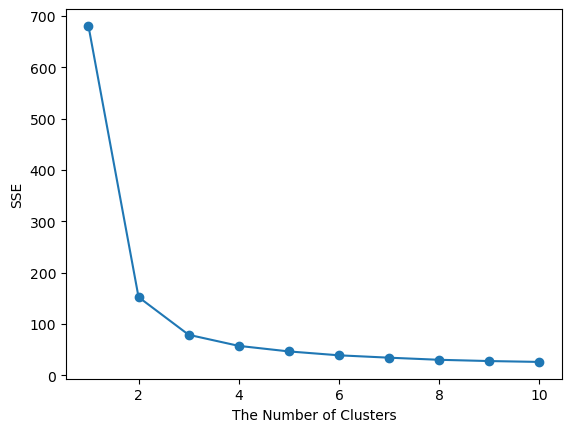

[680.8244000000001, 152.36870647733906, 78.94084142614601, 57.34540931571816, 46.535582051282056, 38.95701115711986, 34.32652991452992, 30.227724598930482, 27.766706937799043, 26.072251823340057]


In [14]:
# 엘보우 기법 결과
import matplotlib.pyplot as plt
def elbow(X):
    sse=[]
    for i in range(1, 11):
        km=KMeans(n_clusters=i, random_state=1)
        km.fit(X)
        sse.append(km.inertia_)
    
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('The Number of Clusters')
    plt.ylabel('SSE')
    plt.show()
    print(sse)
elbow(X)

엘보우 기법을 시각화하여 확인해보면 k값이 2에서 3으로 갈 때 기울기 소실이 발생하므로, 해당 데이터에서는 2~3개 군집이 적절함을 알 수 있다. k값을 3으로 지정하여 최종 군집분석을 진행하자.

In [15]:
#최적의 k로  K-Means 군집화 실행
km = KMeans(n_clusters =3, random_state=1)
km.fit(X)
# 할당된 군집을 iris 데이터에 추가
new_labels = km.labels_
iris['cluster'] = new_labels

iris.groupby(['cluster']).mean()

,sepal length,sepal width,petal length,petal width
cluster,,,,
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.418000,1.464000,0.244000
2,6.850000,3.073684,5.742105,2.071053


군집분석 결과 군집별로 각 특성의 차이가 있는 것으로 보인다. 이를 제대로 검정하기 위해서는 ANOVA 분석을 진행하는 것이 좋다. 

하지만 본 데이터를 시각화하여 분포도를 그려보는 것이 해석하기 더욱 편리하다.

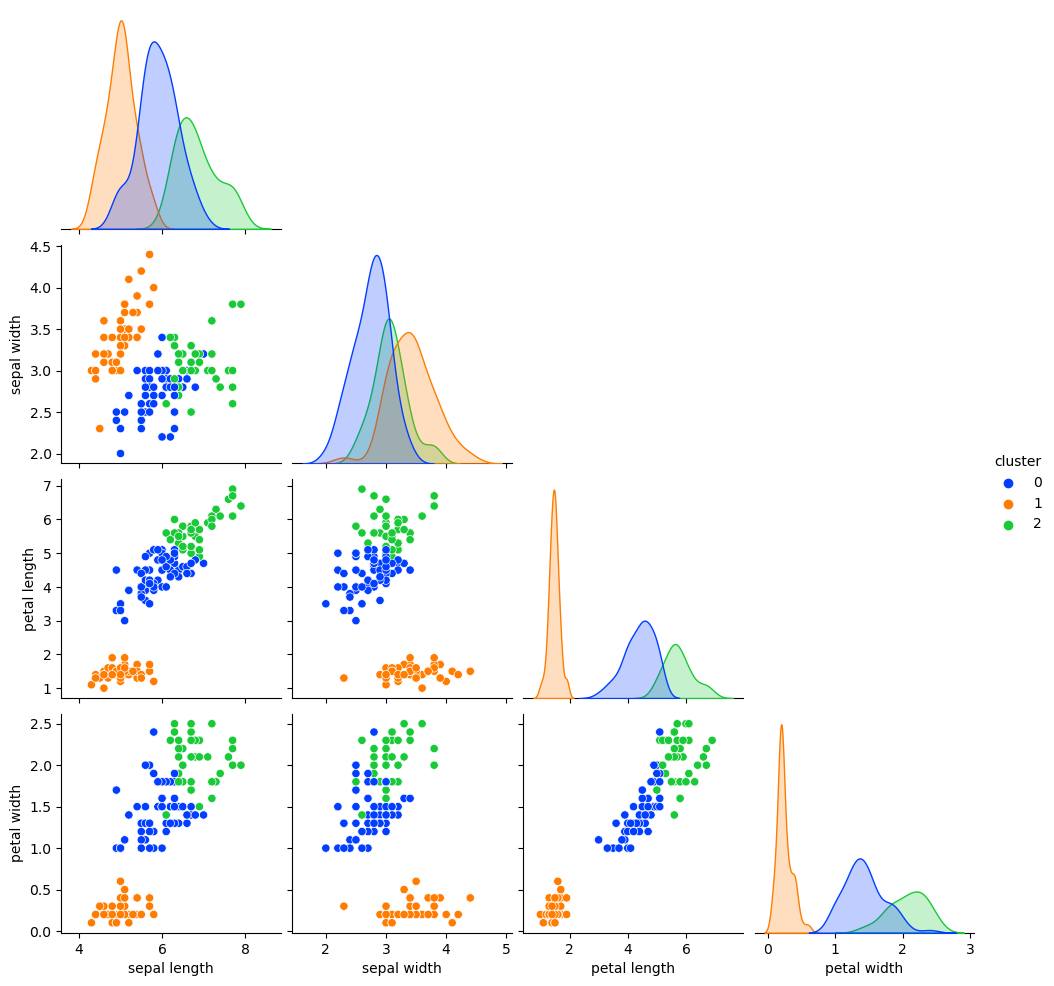

In [16]:
# k-means 시각화 
# 군집결과 시각화
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(iris,
             diag_kind='kde',
             hue="cluster", 
             corner =True,  
             palette='bright')
plt.show()

seaborn의 paireplot 함수를 사용하여 시각화하였다. 변수의 특징별로 3개의 군집으로 잘 나뉘었음을 알 수 있다. 특히 1번 군집은 0,2번 군집보다 어떠한 변수에서도 잘 분리되는 특징을 가진다.

기본적으로 종속변수가 없는 데이터를 군집분석하지만 종속변수를 알고있는 데이터므로 원본데이터와 비교해보자.

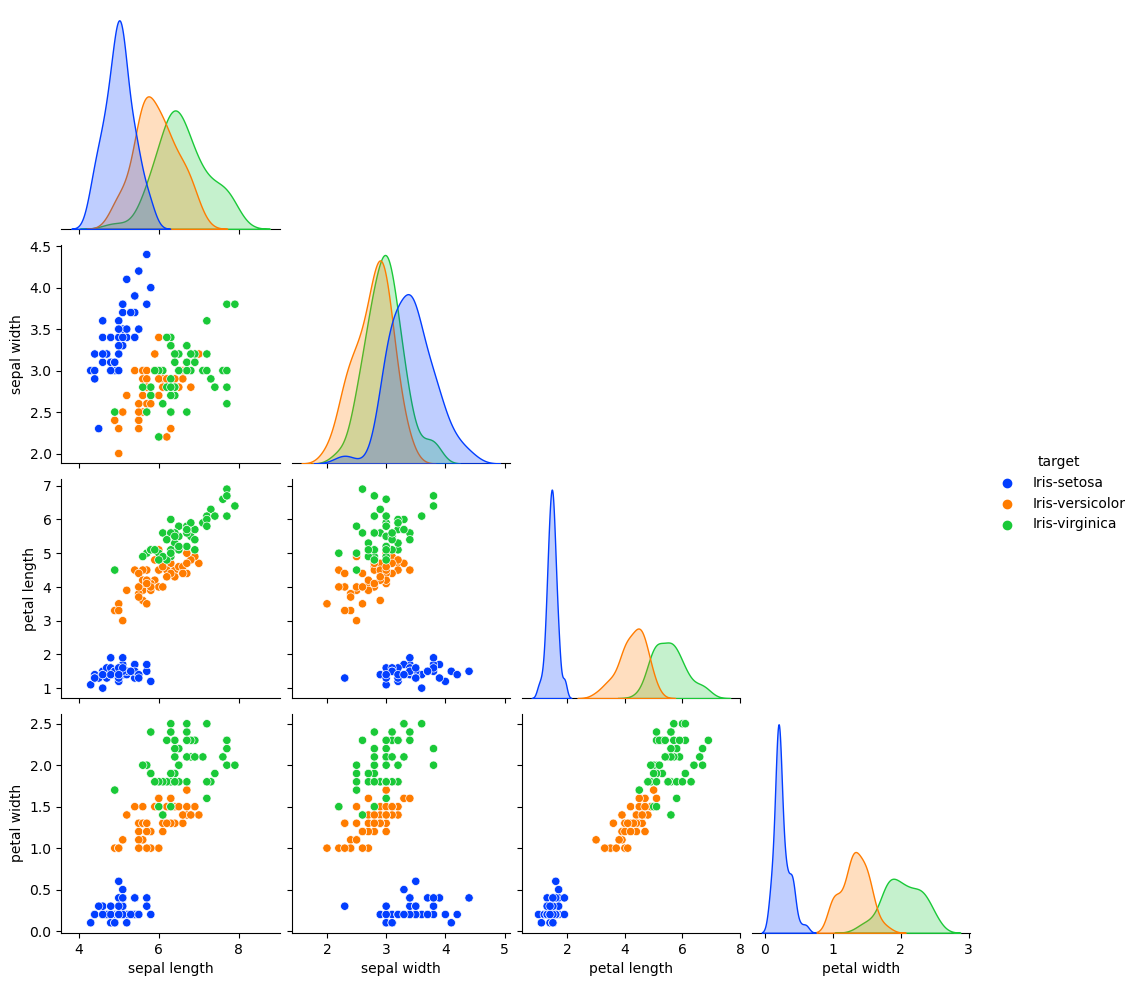

In [17]:
# target 원본데이터
sns.pairplot(iris.drop(columns=['cluster']),
             diag_kind='kde',
             hue="target", 
             corner =True,  
             palette='bright')
plt.show()

결과를 보면, 데이터 특성만 가지고 분류한 것과 실제 꽃 종류로 분류한 것이 큰 차이가 없음을 알 수 있다. 원본데이터를 확인하는 과정은 비지도 학습인 군집분석에서는 원래 진행할 수 없는 과정임을 기억해야 한다.

##### 3) 혼합분포 군집분석
모형을 기반으로 한 군집분석 방법으로 데이터가 k개의 모수적 모형의 가중합으로 표현되는 모집단 모형으로부터 나왔다는 가정하에 군집분석을 진행한다. k개의 각 모형은 군집이며, 각 데이터는 추정된 k개의 모형 중 어느 모형으로부터 나왔을 확률이 높은지에 따라 군집의 분류가 만들어진다. 이 과정에서 공분산 행렬, Likehood의 개념들이 들어간다.

<사용이유>
실생활 데이터를 적용시키기 위해 발전된 모델로 k-means는 원형으로 군집화된 데이터에 적합하고, 밀도기반 클러스터링 방법인 DBSCAN의 경우 실생활에서 거의 보기 힘든 반달형태 데이터를 잘 군집화시키다. 하지만 실생활 데이터는 대부분 정규분포 형태를 지니므로 분포기반 군집분석이 적합한 경우가 많다.

- 장점 : 확률분포를 도입하므로 k-means보다 통계적으로 엄밀한 결과를 얻을 수 있다. // 군집을 몇 개의 모수로 표현할 수 있고, 서로 다른 크기나 모양의 군집을 찾을 수 있다.
- 단점 : 군집 크기가 너무 작으면 추정의 정도가 떨어진다 // 데이터가 커지면 EM알고리즘 적용시 시간과 계산비용이 증가한다 // 이상치에 민감하기 때문에 사전 전처리가 필요하다 // 유형들의 분포가 정규분포와 차이가 크면 결과가 좋지 못하다.

In [25]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

# 데이터업로드
iris = pd.read_csv('./data/iris.csv')
df = iris.drop('target', axis=1)

# 데이터 스케일링
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# 가우시안 혼합모델 구축
gmm = GaussianMixture(n_components=3)
gmm.fit(df_scaled)
gmm_labels = gmm.predict(df_scaled)
gmm_labels

array([0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

혼합분포 군집분석을 통해 gmm_labels 변수에 예상되는 군집을 할당하였다. 이를 cluster 변수에 할당하고 통계량을 확인해보자

In [26]:
df['gmm_cluster']=gmm_labels

# 군집 변수별 통계량 확인
clusters = [0,1,2]
df.groupby('gmm_cluster').mean()

,sepal length,sepal width,petal length,petal width
gmm_cluster,,,,
0,5.083721,3.488372,1.467442,0.251163
1,6.262000,2.872000,4.906000,1.676000
2,4.528571,2.985714,1.442857,0.200000


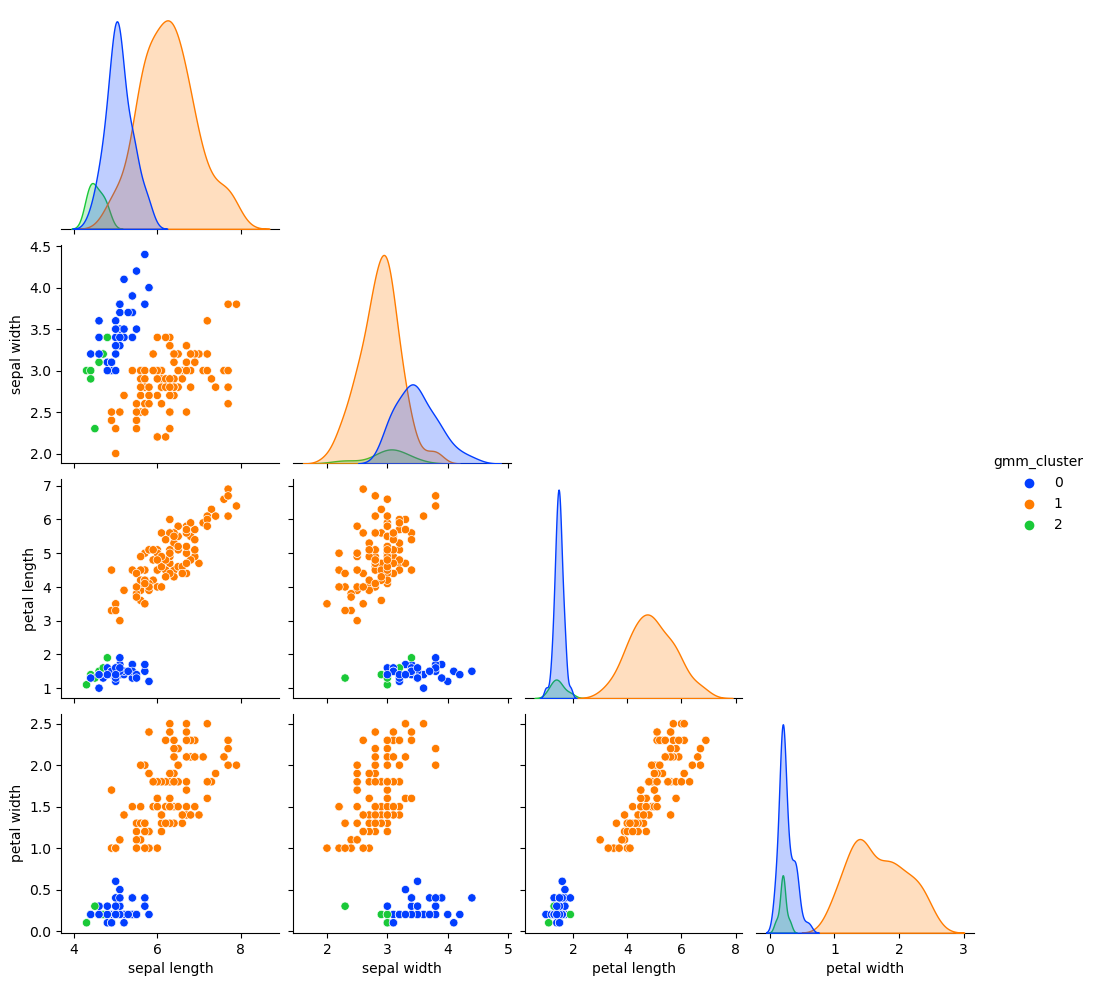

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df,
             diag_kind='kde',
             hue="gmm_cluster", 
             corner =True,  
             palette='bright')
plt.show()

혼합분포 군집결과 iris 데이터가 3개의 그룹으로 잘 나뉜 것을 볼 수 있다. 0번 군집과 2번 군집에 대해서는 gmm 알고리즘이 더 잘 나눈 것처럼 확인된다. (분포그래프 참고)

꽃의 종류는 sepal length, sepal width 변수보다는 petal width, petal length로 구별된다고 할 수 있다. 0번 군집은 petal width, petal length가 높은 꽃의 종류이며, 1번 군집은 petal width, petal length가 낮은 꽆의 종류이다.